<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/lectures/machine_learning/reg_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# Regresión I

## Regressión Lineal


El **modelo de regresión lineal general** o **modelo de regresión multiple**,  supone que, 
$\boldsymbol{Y} =  \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon},$ donde:

* $\boldsymbol{X} = (x_1,...,x_n)^{T}$: variable explicativa
* $\boldsymbol{Y} = (y_1,...,y_n)^{T}$: variable respuesta
* $\boldsymbol{\epsilon} = (\epsilon_1,...,\epsilon_n)^{T}$: error se asume un ruido blanco, es decir, $\epsilon \sim \mathcal{N}( \boldsymbol{0},\sigma^2I)$
* $\boldsymbol{\beta} = (\beta_1,...,\beta_n)^{T}$: coeficientes de regresión.


La idea es tratar de establecer la relación entre las variables independientes y dependientes por medio de ajustar el mejor hyper plano con respecto a los puntos. 

Por ejemplo, para el caso de la **regresión lineal simple**, se tiene la siguiente estructura: $y_i=\beta_0+\beta_1x_i+\epsilon_i.$ En este caso, la regresión lineal corresponderá a la recta que mejor pasa por los puntos observados.

<img src="https://drive.google.com/uc?export=view&id=1EVjtlre2C6E36Nl2m5vrZnF_oMvNeJCS" width = "600" align="center"/>


Existen algunas situaciones donde los modelos lineales no son apropiados:

* El rango de valores de $Y$ está restringido (ejemplo: datos binarios o de conteos).
* La varianza de $Y$ depende de la media.

## Mejores parémetros: Método de minimos cudrados

El **método de mínimos cudrados** es un método de optimización que busca encontrar la mejor aproximación mediante la minimización de los residuos al cuadrado, es decir, se buscar encontrar:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\sum_{i=1}^n (y_{i}-f_{i}(x;\beta))^2   $$

Para el caso de la regresión lineal simple, se busca una función $$f(x;\beta) = \beta_{0} + \beta_{1}x,$$

por lo tanto el problema que se debe resolver es el siguiente:

$$(P)\ \min \sum_{i=1}^n e_{i}^2 =\dfrac{1}{n}\sum_{i=1}^{n}\left ( y_{i}-(\beta_{0} + \beta_{1}x_{i})\right )^2$$ 

Lo que significa, que para este problema, se debe encontrar $\beta = (\beta_{0},\beta_{1})$ que minimicen el problema de optimización. En este caso la solución viene dada por:

$$\hat{\beta}_{1} = \dfrac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2} = \rho (x,y)\ ; \  \hat{\beta}_{0} = \bar{y}-\hat{\beta}_{1} \bar{x} $$

La metodología para encontrar los parámetros $\beta$ para el caso de la regresión lineal multiple se extienden de manera natural del modelo de regresión lineal multiple, cuya solución viene dada por:

$$\beta = (XX^{\top})^{-1}X^{\top}y$$

## Selección de modelos


### Criterio de información de Akaike (AIC)

El [criterio de información de Akaike](https://en.wikipedia.org/wiki/Akaike_information_criterion) (AIC) es una medida de la calidad relativa de un modelo estadístico, para un conjunto dado de datos. Como tal, el AIC proporciona un medio para la selección del modelo.

AIC maneja un trade-off entre la bondad de ajuste del modelo y la complejidad del modelo. Se basa en la entropía de información: se ofrece una estimación relativa de la información perdida cuando se utiliza un modelo determinado para representar el proceso que genera los datos.

AIC no proporciona una prueba de un modelo en el sentido de probar una hipótesis nula, es decir AIC no puede decir nada acerca de la calidad del modelo en un sentido absoluto. Si todos los modelos candidatos encajan mal, AIC no dará ningún aviso de ello.

En el caso general, el AIC es

$$AIC = 2k-2\ln(L)$$


donde $k$ es el número de parámetros en el modelo estadístico , y $L$ es el máximo valor de la función de verosimilitud para el modelo estimado.

### Criterio de información bayesiano (BIC)

En estadística, el [criterio de información bayesiano](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (BIC) o el más general criterio de Schwarz (SBC también, SBIC) es un criterio para la selección de modelos entre un conjunto finito de modelos. Se basa, en parte, de la función de probabilidad y que está estrechamente relacionado con el Criterio de Información de Akaike (AIC).

Cuando el ajuste de modelos, es posible aumentar la probabilidad mediante la adición de parámetros, pero si lo hace puede resultar en sobreajuste. Tanto el BIC y AIC resuelven este problema mediante la introducción de un término de penalización para el número de parámetros en el modelo, el término de penalización es mayor en el BIC que en el AIC.

El BIC fue desarrollado por Gideon E. Schwarz, quien dio un argumento bayesiano a favor de su adopción.1​ Akaike también desarrolló su propio formalismo Bayesiano, que ahora se conoce como la ABIC por Criterio de Información Bayesiano de Akaike "

En el caso general, el BIC es

$$BIC =k\ln(n)-2\ln(L)$$


donde $k$ es el número de parámetros en el modelo estadístico, $n$ es la cantidad de datos disponibles y $L$ es el máximo valor de la función de verosimilitud para el modelo estimado.



### R-cuadrado  



El [coeficiente de determinación](https://en.wikipedia.org/wiki/Coefficient_of_determination) o **R-cuadrado** ($r^2$ ) , es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis. El coeficiente determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

El valor del $r^2$ habitualmente entre 0 y 1, donde 0 significa una mala calidad de ajuste en el modelo y 1 corresponde a un ajuste lineal perfecto. A menudo, este estadístico es ocupado para modelos lineales.  

Se define por la fórmula:


$$r^2 = \dfrac{SS_{reg}}{SS_{tot}} = 1 - \dfrac{SS_{res}}{SS_{tot}},$$

donde:

* **$SS_{reg}$** ( suma explicada de cuadrados (ESS)): $\sum_{i}(\hat{y}-\bar{y})^2$


* **$SS_{res}$**: ( suma residual de cuadrados (RSS)): $\sum_{i}(y_{i}-\hat{y})^2 = \sum_{i}e_{i}^2$


* **$SS_{tot}$**: ( varianza): $\sum_{i}(y_{i}-\bar{y})$, donde: $SS_{tot}=SS_{reg}+SS_{res}$


En una forma general, se puede ver que $r^2$ está relacionado con la fracción de varianza inexplicada (FVU), ya que el segundo término compara la varianza inexplicada (varianza de los errores del modelo) con la varianza total (de los datos).



<img src="https://drive.google.com/uc?export=view&id=1RKh8iNJSqUeRmVeMqPHT0TDxQhxxdWaO" width = "450" align="center"/>



* Las áreas de los cuadrados azules representan los residuos cuadrados con respecto a la regresión lineal ($SS_{tot}$). 

* Las áreas de los cuadrados rojos representan los residuos al cuadrado con respecto al valor promedio ($SS_{res}$).



Por otro lado, a medida que más variables explicativas se agregan al modelo, el $r^2$ aumenta de forma automática, es decir, entre más variables explicativas se agreguen, mejor será la calidad será el ajuste (un falso argumento).



Es por ello que se define el **R cuadrado ajustado**, que viene a ser  una modificación del $r^2$, ajustando por el número de variables explicativas en un modelo ($p$) en relación con el número de puntos de datos ($n$).  


$$r^2_{ajustado} = 1-(1-r^2)\dfrac{n-1}{n-p-1} ,$$




## Error de un modelo

#### Definición

El **error** corresponde a la diferencia entre el valor original y el valor predicho,es decir:

$$e_{i}=y_{i}-\hat{y}_{i} $$

<img src="https://drive.google.com/uc?export=view&id=1wuHBsR_HNlrD8O-Lg9wCssDSaTatFu2t" width = "500" align="center"/>


### Formas de medir el error de un modelo

Para medir el ajuste de un modelo se ocupan las denominadas **funciones de distancias** o **métricas**. Existen varias métricas, dentro de las cuales encontramos:




1. **Métricas absolutas**: Las métricas absolutas o no escalada miden el error sin escalar los valores. Las métrica absolutas más ocupadas son:

    *  **Mean Absolute Error** (MAE)

    $$\textrm{MAE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | y_{t}-\hat{y}_{t}\right |$$

    *  **Mean squared error** (MSE):

    $$\textrm{MSE}(y,\hat{y}) =\dfrac{1}{n}\sum_{t=1}^{n}\left ( y_{t}-\hat{y}_{t}\right )^2$$





2. **Métricas Porcentuales**: Las métricas porcentuales o escaladas miden el error de manera escalada, es decir, se busca acotar el error entre valores de 0 a 1, donde 0 significa que el ajuste es perfecto, mientras que 1 sería un mal ajuste. Cabe destacar que muchas veces las métricas porcentuales puden tener valores mayores a 1.Las métrica Porcentuales más ocupadas son:

    * **Mean absolute percentage error** (MAPE):
    
    $$\textrm{MAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n}\left | \frac{y_{t}-\hat{y}_{t}}{y_{t}} \right |$$

    * **Symmetric mean absolute percentage error** (sMAPE):
    
    $$\textrm{sMAPE}(y,\hat{y}) = \dfrac{1}{n}\sum_{t=1}^{n} \frac{\left |y_{t}-\hat{y}_{t}\right |}{(\left | y_{t} \right |^2+\left | \hat{y}_{t} \right |^2)/2}$$

## Otros estadísticos interesantes del modelo

### Test F

EL [test F](http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm) para regresión lineal prueba si alguna de las variables independientes en un modelo de regresión lineal múltiple es significativa.

En términos de test de hipótesis, se quiere contrastar lo siguiente:


* $H_0: \beta_1 = \beta_2 = ... = \beta_{p-1} = 0$
* $H_1: \beta_j ≠ 0$, para al menos un valor de $j$


### Test Omnibus

EL [test Omnibus](https://en.wikipedia.org/wiki/Omnibus_test)esta relacionado con la simetría y curtosis del resido. Se espera ver un valor cercano a cero que indicaría normalidad. El Prob (Omnibus) realiza una prueba estadística que indica la probabilidad de que los residuos se distribuyan normalmente. 

### Test Durbin-Watson

El [Test Durbin-Watson](https://www.statisticshowto.com/durbin-watson-test-coefficient/) es un test de homocedasticidad. Para ver los límites relacionados de este test, se puede consultar la siguiente [tablas de valores](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/).

### Test Jarque-Bera

Como el [test Omnibus](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) en que prueba tanto el sesgo como la curtosis. Esperamos ver en esta prueba una confirmación de la prueba Omnibus. 


**IMPORTANTE**:


* Cabe destacar que el coeficiente $r^2$ funciona bien en el contexto del mundo de las regresiones lineales. Para el análisis de **modelos no lineales**, esto coeficiente pierde su interpretación.


* Se deja la siguiente [refrerencia](http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis) para comprender conceptos claves de test de hipótesis, intervalos de confianza, p-valor. Estos términos son escenciales para comprender la significancia del ajuste realizado.


* Existen muchas más métricas, pero estas son las más usulaes de encontrar. En el archivo **metrics.py** se definen las distintas métricas presentadas, las cuales serpan de utilidad más adelante.

## Aplicación con python

### Ejemplo sencillo

Para comprender los modelos de regresión lineal, mostraremos un caso sencillo de uso. Para ello realizaremos un simulación de una recta, en el cual le agregaremos un ruido blanco.


In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# ejemplo sencillo

n = 100 
np.random.seed(n)

beta = np.array([1,1]) # coeficientes
x =  np.random.rand(n) # variable independiente

mu, sigma = 0, 0.1 # media y desviacion estandar
epsilon = np.random.normal(mu, sigma, n) # ruido blanco

y = np.dot(np.c_[ np.ones(n),x]  , beta) + epsilon # variables dependientes

# generar dataframe
df = pd.DataFrame({
    'x':x,
    'y':y
})
df.head()

x         y
0  0.543405  1.612417
1  0.278369  1.347058
2  0.424518  1.267849
3  0.844776  1.935274
4  0.004719  1.082601

Grafiquemos los puntos en el plano cartesiano.

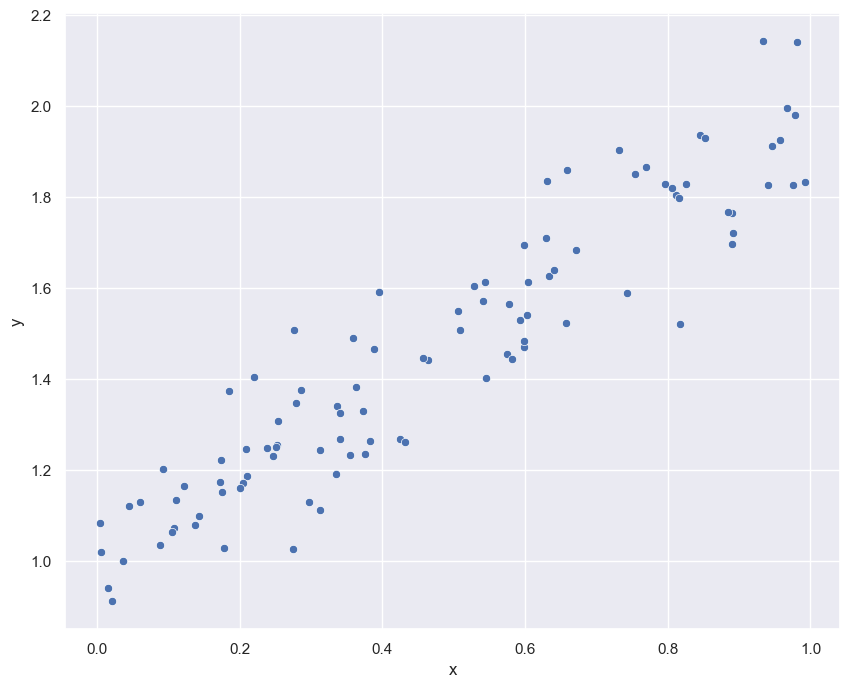

In [3]:
# grafico de puntos
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=df,
)  
plt.show()

Lo primero que debemos hacer es separar nuestro datos en los conjuntos de **training set** y **test set**.
**Concepto de  Train set y Test set**


Al momento de entrenar los modelos de machine leraning, se debe tener un conjunto para poder entrenar el modelo y otro conjunto para poder evaluar el modelo. Es por esto que el conjunto de datos se separá en dos conjuntos: 
    
 * **Train set**: Conjunto de entrenamiento con el cual se entrenarán los algoritmos de machine learning.
 
* **Test set**: Conjunto de testeo para averiguar la confiabilidad del modelo, es decir, cuan bueno es el ajuste del modelo.
    
<img src="https://drive.google.com/uc?export=view&id=1dDfRLOlL_gviE2fNCHAIgWs3Pkw0Y26-" width = "300" align="center"/>


**Tamaño ideal de cada conjunto**

La respuesta depende fuertemente del tamaño del conjunto de datos. A modo de regla empírica, se considerará el tamaño óptimo basado en la siguiente tabla:

| número de filas      | train set | test set |
|----------------------|-----------|----------|
| entre 100-1000       | 67%       | 33%      |
| entre 1.000- 100.000 | 80%       | 20%      |
| mayor a 100.000      | 99%       | 1%       |

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with

X = df[['x']] # we only take the first two features.
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print rows train and test sets
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  100
numero de filas train set     :  80
numero de filas test set      :  20


Existen varias librerías para poder aplicar modelos de regresión, de los cuales la atención estará enfocada en las librerías de `statsmodels` y `sklearn`.

#### Ejemplo con Statsmodel

Para trabajar los modelos de `statsmodel`, basta con instanciar el comando `OLS`. El modelo **no considera intercepto**, por lo tanto, para agregar el intercepto, a las variables independientes se le debe agregar un vector de unos (tanto para el conjunto de entranamiento como de testeo).

In [5]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

En `statsmodel` existe un comando para ver información del modelo en estudio mediante el comando `summary`

In [6]:
# resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     658.4
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           8.98e-40
Time:                        18:28:07   Log-Likelihood:                 69.472
No. Observations:                  80   AIC:                            -134.9
Df Residuals:                      78   BIC:                            -130.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9805      0.021     46.338      0.0

A continuación se dara una interpretación de esta tabla:

**Descripción del Modelo**


Estos son estadísticas relacionadas a la ejecución del modelo.

| Variable         | Descripión                                   |
|------------------|----------------------------------------------|
| Dep. Variable    | Nombre de la variables dependiente           |
| Model            | Nombre del modelo ocupado                    |
| Method           | Método para encontrar los parámetros óptimos |
| Date             | Fecha de ejecución                           |
| No. Observations | Número de observaciones                      |
| Df Residuals     | Grados de libertas de los residuos           |
| Df Model         | Grados de libertad del modelo                |
| Covariance Type  | Tipo de covarianza                           |

**Ajustes del Modelo**

Estos son estadísticas relacionadas con la verosimilitud y la confiabilidad del modelo.

| Variable           | Descripión                               |
|--------------------|------------------------------------------|
| R-squared          | Valor del R-cuadrado                     |
| Adj. R-squared     | Valor del R-cuadrado ajustado            |
| F-statistic        | Test para ver si todos los parámetros son iguales a cero|
| Prob (F-statistic) | Probabilidad Asociada al test            |
| Log-Likelihood     | Logaritmo de la función de verosimilitud |
| AIC                | Valor del estadístico AIC                |
| BIC                | Valor del estadístico BIC                |

En este caso, tanto el **r-cuadrado** como el **r-cuadrado** ajustado están cerca del 0.9, se tiene un buen ajuste lineal de los datos. Además, el **test F** nos da una probabilidad menor al 0.05, se rechaza la hipótess nula que los coeficientes son iguales de cero.

**Parámetros del modelo**

La tabla muestra los valores asociados a los parámetros del modelo

|          | coef   | std err | t      | P>\|t\| | [0.025 | 0.975] |
|----------|--------|---------|--------|---------|--------|--------|
| const    | 0.9805 | 0.021   | 46.338 | 0.000   | 0.938  | 1.023  |
| x        | 1.0099 | 0.039   | 25.659 | 0.000   | 0.932  | 1.088  |


Acá se tiene:

* **Variables**: Las variables en estudio son `const` (intercepto) y `x`.
* **coef**: Valor estimado del coeficiente.
* **std err**: Desviación estandar del estimador.
* **t**: t = estimate/std error.
* **P>\|t\|**:p-valor individual para cada parámetro para aceptar o rechazar hipótesis nula (parámetros significativamente distinto de cero).
* **[0.025 | 0.975]**: Intervalo de confianza de los parámetros


En este caso, los valores estimados son cercanos a 1 (algo esperable debido a la simulación realizadas), además, se observa que cada uno de los parámetros es significativamente distinto de cero.

**Estadísticos interesantes del modelo**

| Variable         | Descripción                                                                                         |
|------------------|-----------------------------------------------------------------------------------------------------|
| Omnibus          | Prueba de la asimetría y curtosis de los residuos                                                   |
| Prob(Omnibus)    | Probabilidad de que los residuos se distribuyan normalmente                                         |
| Skew             | Medida de simetría de los datos                                                                     |
| Kurtosis         | Medida de curvatura de los datos                                                                    |
| Durbin-Watson    | Pruebas de homocedasticidad                                                                         |
| Jarque-Bera (JB) | Como la prueba Omnibus, prueba tanto el sesgo como la curtosis.                                     |
| Prob(JB)         | Probabilidad de que los residuos se distribuyan normalmente                                         |
| Cond. No.        | Número de condición. Mide la sensibilidad de la salida de una función en comparación con su entrada |


En este caso:

* Tanto el test de Omnibus como el test  Jarque-Bera nos arroja una probabilidad cercana a uno, lo cual confirma la hipótesis que los residuos se distribuyen de manera normal. 

* Para el test de Durbin-Watson, basados en la [tablas de valores](https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/model-assumptions/test-for-autocorrelation-by-using-the-durbin-watson-statistic/)(tamaño de la muestra 80 y número de variables 2), se tiene que los límites para asumir que no existe correlación en los residuos es de: $[d_u,4-d_u]=[1.66,2.34]$, dado que el valor obtenido (1.753) se encuentra dentro de este rango, se concluye que no hay autocorrelación de los residuos.

* El [número de condición](https://en.wikipedia.org/wiki/Condition_number) es pequeño (podemos asumir que menor a 30 es un buen resultado) por lo que podemos asumir que no hay colinealidad de los datos.

Ahora, para convencernos de manera visual de los resultados, realicemos un gráfico con el ajuste lineal:

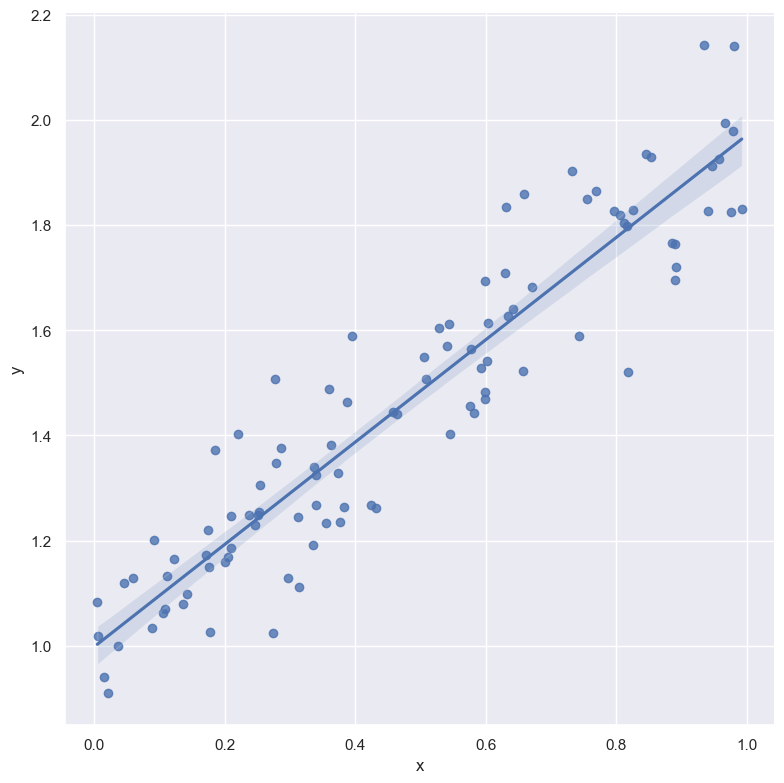

In [7]:
# grafico de puntos
sns.lmplot(
    x='x',
    y='y',
    data=df,
    height = 8,
)  
plt.show()

### Análisis del error

#### Predicciones

Ahora que ya se tiene el modelo entrenado y se ha analizado sus principales características, se pueden realizar predicciones de los valores que se desconocen, de la siguiente manera:

In [8]:
# predicciones
y_pred = results.predict(sm.add_constant(X_test))

Ahora, analizaremos las métricas de error asociado a las predicciones del modelo:

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [10]:
from sklearn.metrics import r2_score

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

print('\nMetricas para el regresor consumo_litros_milla:\n')
regression_metrics(df_temp)


Metricas para el regresor consumo_litros_milla:



mae     mse    rmse    mape   smape
0  0.1028  0.0171  0.1309  6.7733  0.1269

#### Normalidad de los residuos

Basados en los distintos test (Durbin-Watson,Omnibus,Jarque-Bera ) se concluye que los residuos del modelo son un ruido blanco. Para convencernos de esto de manera gráfica, se realizan los siguientes gráficos de interés.

**Función de Autocorrelación**

La función de autocorrelación muestra que los residuos se encuentra dentro de la banda de valores críticos $(-0.2,0.2)$, concluyendo que no existe correlación entre los residuos.

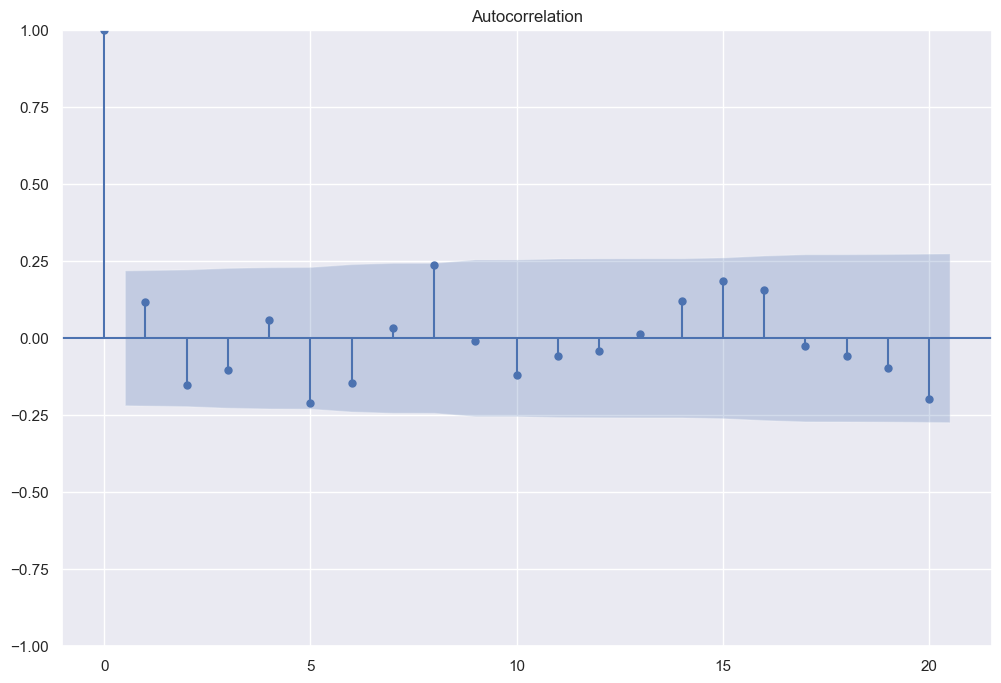

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
sns.set(rc={'figure.figsize':(12,8)})

# funcion de autocorrelation
plot_acf(results.resid)
plt.show()

**QQ-plot**

La gráfica de **qq-plot** nos muestra una comparación en las distribución de los residuos respecto a una población con una distribución normal. En este caso, los puntos (que representan la distribución de los errores) se encuentran cercana a la recta (distribución normal), concluyendo que la distribución de los residuos sigue una distribución normal.

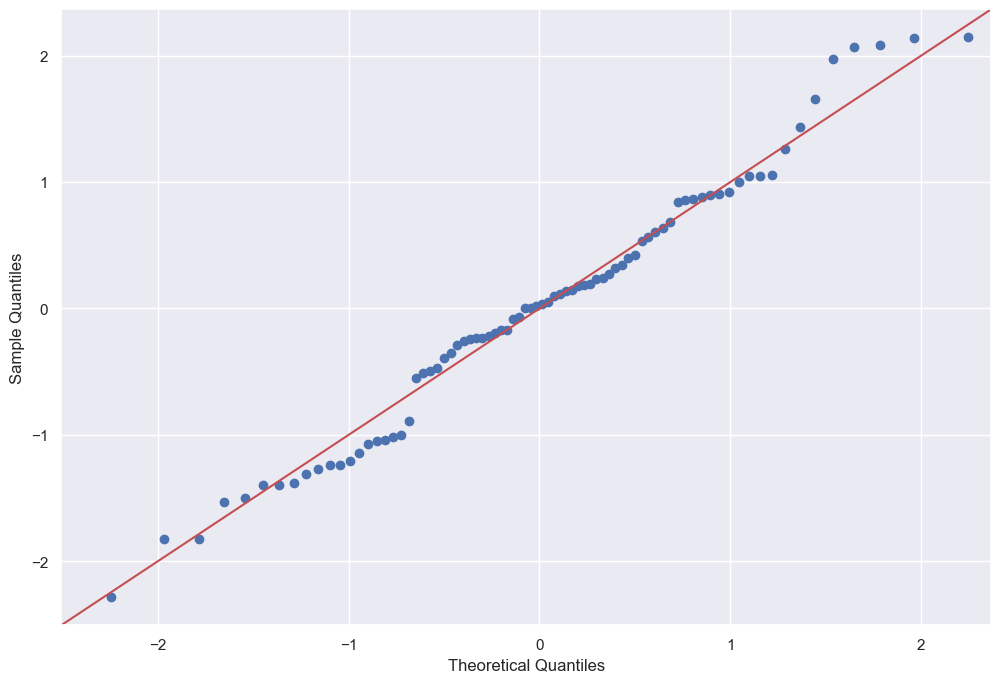

In [12]:
import scipy.stats as stats
fig = sm.qqplot(results.resid, stats.t, fit=True, line="45")
plt.show()

**Histograma**

Esta es una comparación directa enntre la distribución de los residuos versus la distribución de una variable normal mediante un histograma.

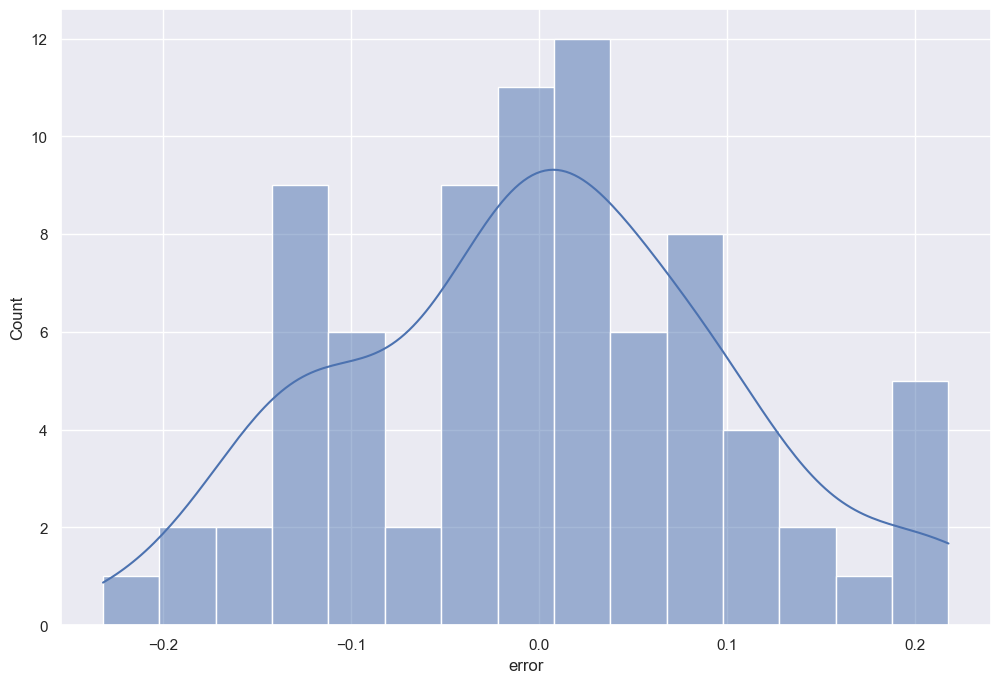

In [13]:
df_hist = pd.DataFrame({'error':results.resid})
sns.histplot(
    x='error',
    data=df_hist,
    kde=True,
     bins=15
)  
plt.show()

A modo de conclusión, es correcto asumir que los errores siguen la distribución de un ruido blanco, cumpliendo correctamente con los supuestos de la regresión lineal.

## Outliers

<img src="https://drive.google.com/uc?export=view&id=1w1QwMLYd5QtjlC99I-fSfrBLWrqfxYp7" width = "400" align="center"/>


Un outlier (o valor atípico) una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas. Estos valores pueden afectar fuertemente al modelo de regresión logística. Veamos un ejemplo:


In [14]:
# ejemplo sencillo

n = 100 
np.random.seed(n)

beta = np.array([1,1]) # coeficientes
x =  np.random.rand(n) # variable independiente


In [15]:
mu, sigma = 0, 0.1 # media y desviacion estandar
epsilon = np.random.normal(mu, sigma, n) # ruido blanco

y = np.dot(np.c_[ np.ones(n),x]  , beta) + epsilon # variables dependientes

y[:10] = 3.1 # contaminacion
x[10] = x[10]-1
y[10]= y[10]-1
x[11] = x[11] +1
y[11] = y[11]+1

# etiqueta
outlier = np.zeros(n)
outlier[:10] = 1
outlier[10:12] = 2

# generar dataframe
df = pd.DataFrame({
    'x':x,
    'y':y,
    'outlier':outlier
})

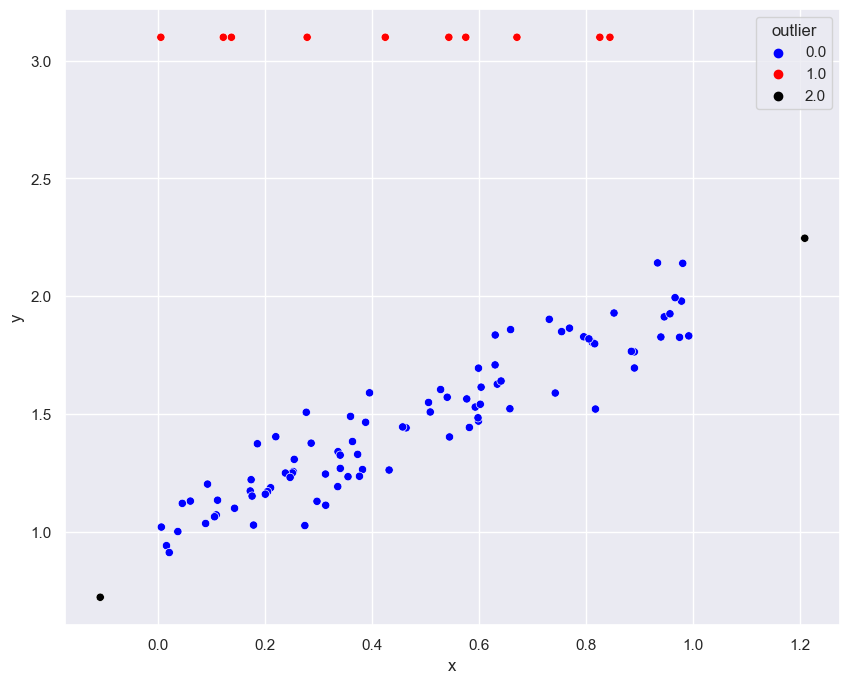

In [16]:

# grafico de puntos
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    hue='outlier',
    data=df,
    palette = ['blue','red','black']
)  
plt.show()
plt.show()

En este caso, se tiene dos tipos de outliers en este caso:

* **Significativos**: Aquellos outliers que afectan la regresión cambiando la tendencia a este grupo de outliers (puntos rojos).
* **No significativo**: Si bien son datos atípicos  puesto que se encuentran fuera de la nube de puntos, el ajuste de la regresión lineal no se ve afectado (puntos negros).

Veamos el ajuste lineal.

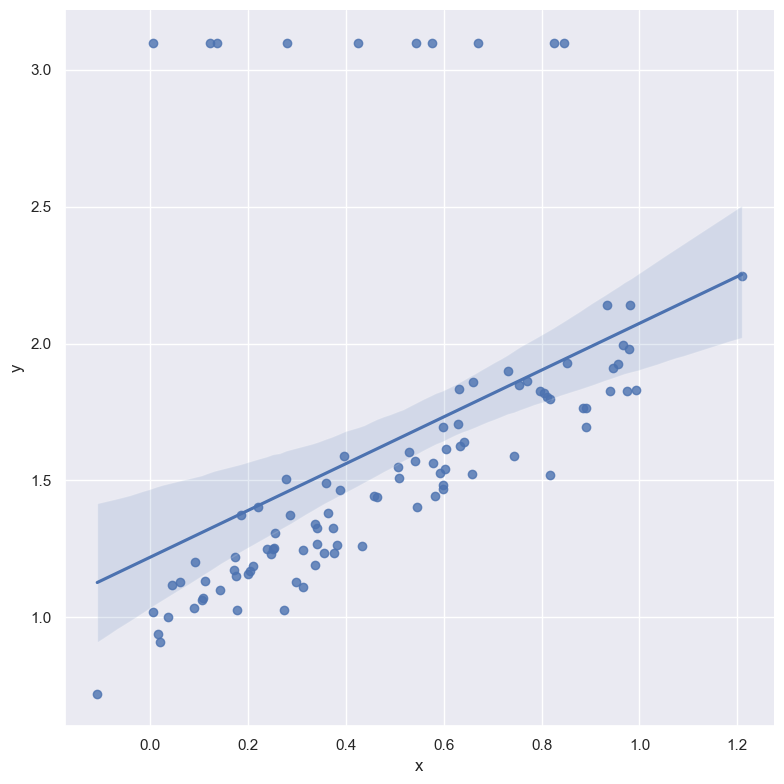

In [17]:
# grafico de puntos
sns.lmplot(
    x='x',
    y='y',
    data=df,
    height = 8,
)  
plt.show()

Otro gráfico de interés, es el [gráfico de influencia](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/), que analiza la distancia de Cook de los residuos.

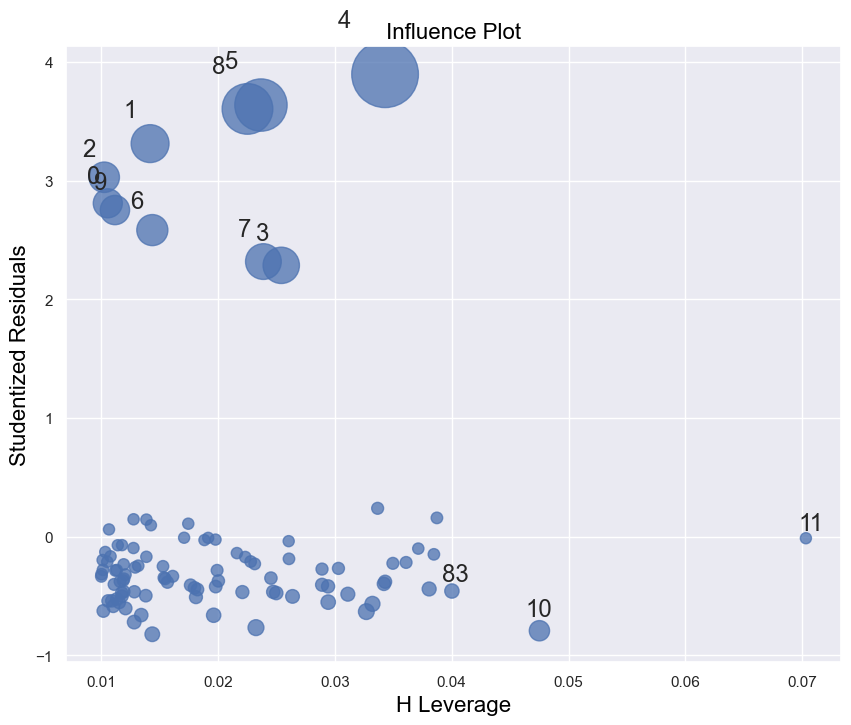

In [18]:
# modelos de influencia
X = df[['x']] # we only take the first two features.
y = df['y']
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
sm.graphics.influence_plot(results)
plt.show()

Los puntos **grandes** se interpretan como puntos que tienen una alta influencia sobre la regresión lineal, mientras aquellos puntos **pequeños** tienen una influencia menor.

#### ¿ Qué hacer ante la presencia de outliers?

En este caso, la recta se ve fuertemente afectadas por estos valores. Para estos casos se pueden hacer varias cosas:

* **Eliminación de los outliers**: Una vez identificado los outliers (algo que no es tan trivial de identificar para datos multivariables), se puden eliminar y seguir con el paso de modelado.
    * **Ventajas**: Fácil de trabajar la data para los modelos que dependen fuertemente de la media de los datos.
    * **Desventajas**: Para el caso multivariables no es tán trivial encontrar outliers.


* **Modelos más robustos a outliers**: Se pueden aplicar otros modelos de regresión cuya estimación de los parámetros, no se vea afectado por los valores de outliers.
    * **Ventajas**: El análisis se vuelve independiente de los datos.
    * **Desventajas**: Modelos más costoso computacionalmente y/o más complejos de implementar.

## Conclusión

* Los modelos de regresión lineal son una gran herramienta para realizar predicciones.
* Los outliers afectan considerablemente a la regresión lineal, por lo que se debn buscar estrategias para abordar esta problemática.
* En esta oportunidad se hizo un detalle técnico de disntintos estádisticos asociados a la regresión líneal (apuntando a un análisis inferencial ), no obstante, en los próximos modelos, se estará interesado en analizar las predicciones del modelo y los errores asociados a ella, por lo cual los aspectos técnico quedarán como lecturas complementarias.
* Existen varios casos donde los modelos de regresión líneal no realizan un correcto ajuste de los datos, pero es una gran herramienta para comenzar.

## Referencias

1. [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)